<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#NLP-Project:-Email-Analysis-📧🔍" data-toc-modified-id="NLP-Project:-Email-Analysis-📧🔍-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>NLP Project: Email Analysis 📧🔍</a></span><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA)</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#SPAM-Detection-Model" data-toc-modified-id="SPAM-Detection-Model-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>SPAM Detection Model</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Naive Bayes</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Support-Vector-Classifier-(SVC)" data-toc-modified-id="Support-Vector-Classifier-(SVC)-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Support Vector Classifier (SVC)</a></span></li><li><span><a href="#Multilayer-Perceptron-(MLP)" data-toc-modified-id="Multilayer-Perceptron-(MLP)-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Multilayer Perceptron (MLP)</a></span></li><li><span><a href="#Procedure-description" data-toc-modified-id="Procedure-description-1.3.6"><span class="toc-item-num">1.3.6&nbsp;&nbsp;</span>Procedure description</a></span></li></ul></li><li><span><a href="#Topic-Modeling-of-SPAM-emails" data-toc-modified-id="Topic-Modeling-of-SPAM-emails-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Topic Modeling of SPAM emails</a></span></li><li><span><a href="#Extracting-organizations-from-the-non-SPAM-emails" data-toc-modified-id="Extracting-organizations-from-the-non-SPAM-emails-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Extracting organizations from the non-SPAM emails</a></span></li></ul></li></ul></div>

# NLP Project: Email Analysis 📧🔍

Hello everyone! 😊

This project aims to develop a library capable of analyzing received emails. In particular, the tasks include:

* Training a classifier to identify SPAM emails.
* Identifying the main topics within the SPAM emails in the dataset.
* Extracting organizations from the non-SPAM emails.

The Python library `email_analysis_library` contains all the custom functions utilized throughout the project, which are divided into the modules `preprocessing`, `spam_detection`, `lda`, and `ner`.<br>Furthermore, `requirements.txt` can be employed to install the necessary dependencies in the project's virtual environment (Python version: 3.9.0). Detailed instructions for setting up the virtual environment are provided in the README file of the corresponding [GitHub repository](https://github.com/Mat-Gug/nlp-project).

## Exploratory Data Analysis (EDA)

Let's start by glancing at the dataset, contained in the `spam_dataset.csv` file:

In [1]:
import pandas as pd
from email_analysis_library.preprocessing import (
    show_barplot,
    clean_data,
    show_wordclouds
)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gugli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('spam_dataset.csv')
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\nthe transport v...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0
5168,2933,ham,Subject: calpine daily gas nomination\n>\n>\nj...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


All emails seem to start with the string `"Subject: "`. This is confirmed by the following code chunk:

In [3]:
non_subject_rows = df[~df['text'].str.startswith("Subject: ")]
non_subject_count = non_subject_rows['text'].count()
print(f"Number of texts that don't start with 'Subject: ': {non_subject_count}")

Number of texts that don't start with 'Subject: ': 0


Therefore, a regular expression will be added to the preprocessing function to remove this string from all the texts.

Let's also see how the emails are distributed in the two categories:

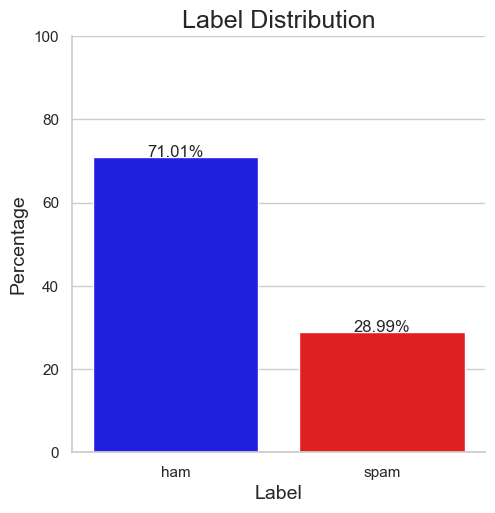

In [4]:
show_barplot('label', df)

Although not excessively, there is a presence of class imbalance. For this reason, during the hyperparameter tuning of the binary spam detection classification model, this imbalance will be taken into account by adjusting the weights assigned to observations in the calculation of the loss function.

## Data Preprocessing

A data cleaning function is created, which takes a document as input and performs the following operations:
1. Converts the sentence to lowercase.
2. Removes English **stop words**. Stop words are the words that are most occurring in a text and don’t carry any importance in classification tasks. For example, words like "a", "an", "i", "the", etc.
3. Removes the prefix "Subject:" (if present).
4. Removes punctuation.
5. Removes digits.
6. Tokenizes the sentence using spaCy and lemmatizes each token.
7. Removes extra whitespaces.

**Note**. In order for the data cleaning function to properly work, you need to install in your virtual environment the `"en_core_web_trf"` pre-trained English pipeline trained on written web text, which is provided by `spacy` library. This can be done through the command `python -m spacy download en_core_web_trf`.

The cleaned corpus is returned by the `clean_data()` function:

In [5]:
# df["text_cleaned"] = clean_data(df["text"])

To avoid performing the data cleaning procedure many times, the dataframe with the new column `text_cleaned` is saved in `cleaned_spam_dataset.csv`:

In [6]:
# df.to_csv('cleaned_spam_dataset.csv', index=False)
df = pd.read_csv('cleaned_spam_dataset.csv')

Let's see the comparison of an email with its cleaned version:

In [7]:
df['text'][0]

"Subject: enron methanol ; meter # : 988291\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\nflow data provided by daren } .\nplease override pop ' s daily volume { presently zero } to reflect daily\nactivity you can obtain from gas control .\nthis change is needed asap for economics purposes ."

In [8]:
df["text_cleaned"][0]

'enron methanol meter follow note give monday preliminary flow datum provide daren please override pop daily volume presently zero reflect daily activity obtain gas control change need asap economic purpose'

**Note**. The provided function handles the removal of newline symbols (`\n`) implicitly through the operations it performs. Specifically, the use of `sentence.split()` during the removal of stopwords and the subsequent rejoining with `' '.join()` can remove whitespace, including that generated by newline symbols. An example of this is given by the following code chunk:

In [9]:
sentence = "Hi\nI'm Mattia"
print(sentence.split())
" ".join(sentence.split())

['Hi', "I'm", 'Mattia']


"Hi I'm Mattia"

Let's check if there are NaN values in the cleaned emails:

In [10]:
df.isna().sum()

Unnamed: 0       0
label            0
text             0
label_num        0
text_cleaned    19
dtype: int64

In [11]:
df[df["text_cleaned"].isna()]

,Unnamed: 0,label,text,label_num,text_cleaned
154,4592,spam,Subject: \n,1,NaN
182,4727,spam,Subject: \n,1,NaN
296,4690,spam,Subject: \n,1,NaN
363,4682,spam,Subject: \n,1,NaN
1130,4136,spam,Subject: \n,1,NaN
1279,3749,spam,Subject: \n,1,NaN
1369,4282,spam,Subject: \n,1,NaN
1508,5129,spam,Subject: re [ 8 ]\n,1,NaN
2184,4600,spam,Subject: \n,1,NaN
2538,4705,spam,Subject: \n,1,NaN


Therefore, it seems that saving the dataframe to a csv file through the `to_csv` method converted empty strings to NaN values. Since these emails do not carry any information, they are removed from the dataframe:

In [12]:
df = df.dropna()
df.isna().sum()

Unnamed: 0      0
label           0
text            0
label_num       0
text_cleaned    0
dtype: int64

Before moving to train and evaluate different models for spam detection, let's use the cleaned emails to plot the **word clouds** for both the categories. 

A **word cloud** is a visual representation of a collection of words where the size and font of each word indicates its frequency or importance within the dataset. It is used to give a quick visual overview of the most prominent terms in each category.

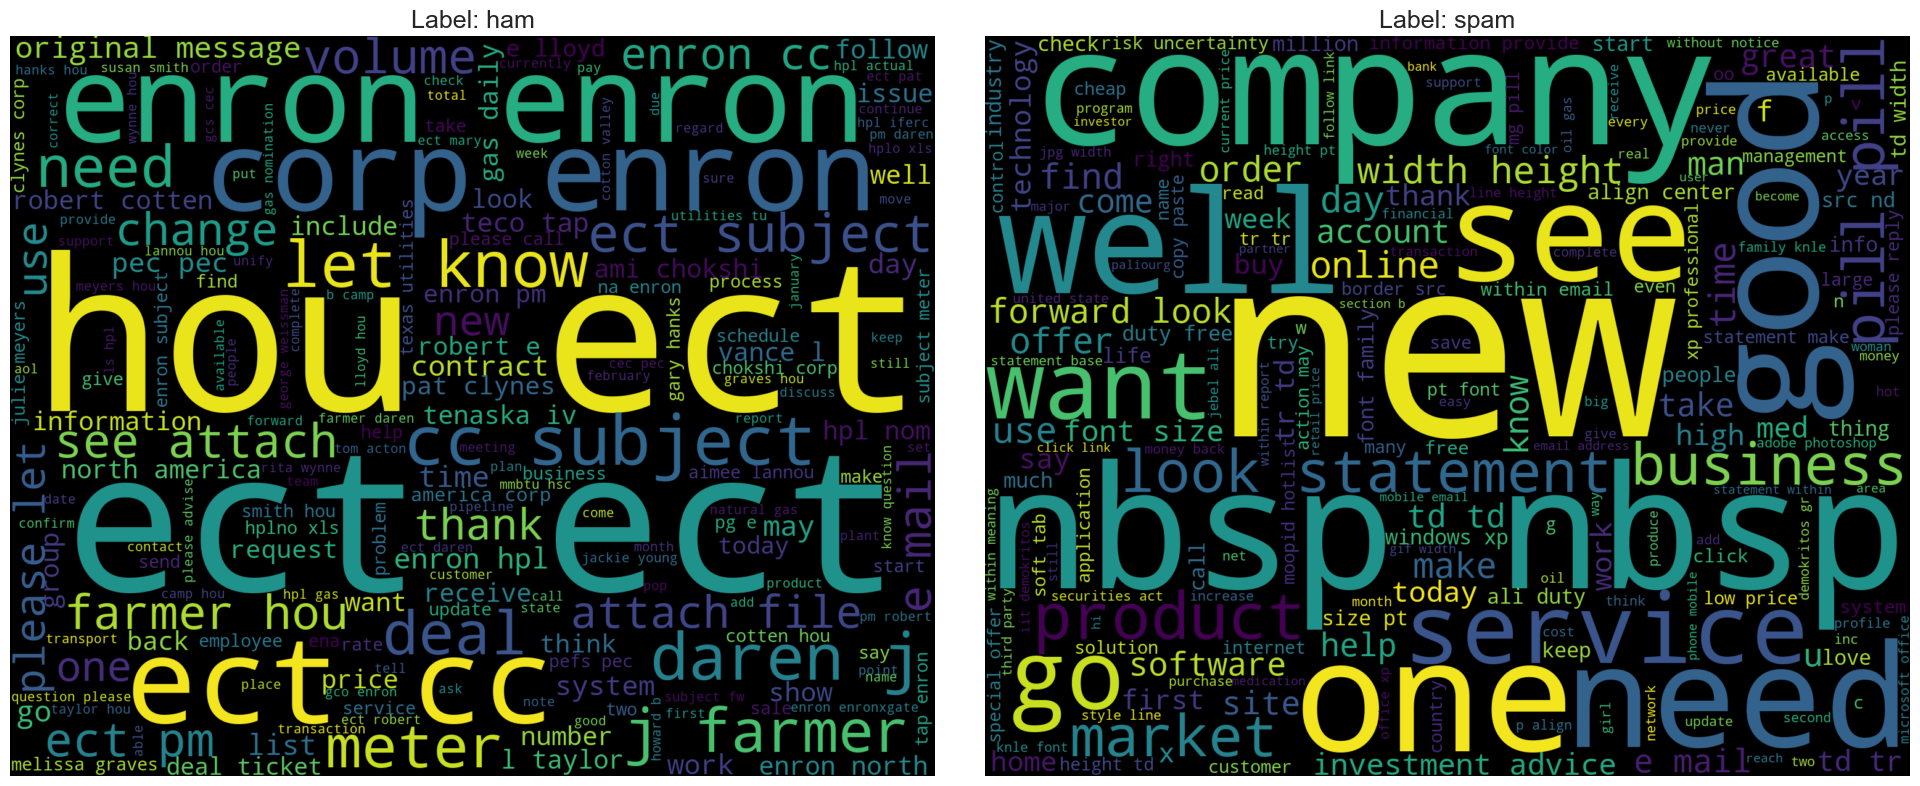

In [13]:
show_wordclouds('label', 'text_cleaned', df)

**Observation**. It seems that there are some words that are repeated. Actually, the reason is that the `WordCloud` class has a parameter, `collocations`, that allows us to decide whether to include collocations (bigrams) of two words. Its default value is `True`, and must be set to `False` in order not to detect collocations, like for example "hou ect" and "ect ect" in the `Label: ham` word cloud.

## SPAM Detection Model

After completing the data cleaning process, the next crucial step involves vectorizing the textual corpus to prepare it for input into a binary classification model for spam detection. The chosen technique for this purpose is **TF-IDF (Term Frequency-Inverse Document Frequency)**.

TF-IDF is a widely used technique in natural language processing (NLP) to vectorize documents within a corpus. The goal of TF-IDF is to represent the importance of words in individual documents while considering their significance across the entire corpus.

This technique consists of computing the TF-IDF score for each term of the dictionary. This score is obtained by multiplying the TF and IDF values:
$$
\text{TF-IDF}(t,d,D)=\text{TF}(t,d)\times\text{IDF}(t,D)
$$
Let's elaborate on the two terms:
* **Term Frequency (TF)**.<br>TF is a measure of how often a term appears in a document. It is calculated as the ratio of the number of occurrences of a term to the total number of words in the document: 
$$
TF(t,d) = \frac{\text{Number of times term t appears in document d}}{\text{Total number of terms in document d}}
$$
Therefore, TF is zero if the term $t$ is not present in document $d$.
* **Inverse Document Frequency (IDF)**.<br>IDF measures the importance of a term across the entire corpus. Terms that appear frequently in many documents are given lower weights, while terms that appear less frequently are given higher weights. For each term, and using the `TfidfVectorizer`’s default settings, IDF is calculated as: 
$$
IDF(t,D)=\log\left(\frac{\text{Total number of documents in the corpus D + 1}}{\text{Number of documents containing term t + 1}}\right)+1
$$
The "+1" in the numerator and denominator are added as if an extra document was seen containing every term in the collection, which prevents zero divisions (this is controlled by the `smooth_idf` parameter, whose default value is True), while the logarithm helps scale down the values.

Therefore, each document is represented as a vector where each element corresponds to the TF-IDF score of a term in the document. The resulting vectors form the TF-IDF matrix representation of the entire corpus. Let's see this in a simple example taken from the [scikit-learn documentation of TfidfVectorizer class](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer):

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [15]:
X.toarray()

array([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524],
       [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
        0.53864762, 0.28108867, 0.        , 0.28108867],
       [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
        0.        , 0.26710379, 0.51184851, 0.26710379],
       [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524]])

To reduce the number of words in the vocabulary, `max_df` and `min_df` parameters are used, which tell the vectorizer to ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words) and strictly lower than the given threshold, respectively. They will be considered as hyperparameters in the hyperparameter tuning procedure, allowing `max_df` to take a value in the range $[0.8,0.99]$, and `min_df` in the range $[0.01,0.15]$.

Before moving to the hyperparameter tuning phase, let's perform a stratified split of the dataset in train and test set:

In [16]:
from sklearn.model_selection import train_test_split

X = df['text_cleaned'].values
y = df['label_num'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

To perform hyperparameter tuning and choose the best model according to a metric, I used the open source hyperparameter optimization framework called [**Optuna**](https://optuna.org/). Optuna iteratively explores the hyperparameter search space, evaluates the objective function, and refines its search based on the observed performance. In particular, I took the cue from the [`sklearn_additional_args.py` example](https://github.com/optuna/optuna-examples/blob/main/sklearn/sklearn_additional_args.py) available on the GitHub profile of Optuna. The models I considered are:
* **Logistic Regression**.
* **Naive Bayes**.
* **Random Forest**.
* **Support Vector Classifier**.
* **Multilayer Perceptron**.

Let's briefly describe each of them, and then describe the hyperparameter tuning procedure that was followed.

### Logistic Regression

As an optimization problem, binary class logistic regression with regularization term $r(W)$ minimizes the following cost function:
$$
\text{min}_W\left\{-C\sum_{i=1}^Ns_i\left[y_i\log(\hat{p}(X_i))+(1-y_i)\log(1-\hat{p}(X_i))\right]+r(W)\right\}
$$
where $s_i$ corresponds to the weights assigned by the user to a specific training sample, $C$ is the inverse of regularization strength, and
$$
\hat{p}(X_i) = \frac{1}{1+\exp(-W\cdot X_i)}
$$
is the probability of the positive class predicted by the model for the $i$-th observation. Here, $X_i=(1,x_{1,i},...,x_{M,i})$ and $W=(w_0,w_1,...,w_M)$.<br>
Regarding the logistic regression model, the hyperparameter tuning is performed on the `C` and `class_weight` parameters, with the former taking a value in the range $[10^{-2},10^2]$ (its value being sampled from the log domain), and the latter being either `None` or `"balanced"`.

### Naive Bayes

As explained in [scikit-learn official documentation](https://scikit-learn.org/stable/modules/naive_bayes.html), Naive Bayes methods are a set of supervised learning algorithms based on Bayes' theorem. They are called "naive" because they make a strong assumption of conditional independence between every pair of features given the value of the class variable. This simplifies the calculations and makes the algorithm computationally efficient. Bayes’ theorem states the following relationship, given class variable $y$ and a vector $\mathbf{x}=(x_1,\ldots ,x_n)$ encoding some $n$ features (independent variables):
$$
P(y|x_1,\ldots ,x_{n})=\frac{P(y)P(x_1,\ldots ,x_n|y)}{P(x_1,\ldots ,x_n)}
$$ 
Using the naive conditional independence assumption that
$$
P(x_i|y,x_1,\ldots,x_{i-1},x_{i+1},\ldots,x_{n})=P(x_i|y)
$$
for all $i$, this relationship is simplified to
$$
P(y|x_1,\ldots ,x_{n})=\frac{P(y)\prod_{i=1}^nP(x_i|y)}{P(x_1,\ldots ,x_n)}
$$
Since $P(x_1,\ldots,x_n)$ is constant given the input, we can use the following classification rule:
$$
P(y|x_1,\ldots,x_n)\propto P(y)\prod_{i=1}^nP(x_i|y)\quad\implies\quad\hat{y}= \arg\max_{y}P(y)\prod_{i=1}^nP(x_i|y)
$$
and we can use Maximum A Posteriori (MAP) estimation to estimate $P(y)$ and $P(x_i|y)$; the former is then the relative frequency of class $y$ in the training set.<br>The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of $P(x_i|y)$. In particular, I will use Multinomial Naive Bayes and Complement Naive Bayes and perform hyperparameter tuning of `alpha` parameter in both cases, allowing the latter to take a value in the range $[10^{-4},1]$, its value being sampled from the log domain.<br>In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering, which is our case.<br>**Note**. The multinomial distribution normally requires integer feature counts (e.g., word counts for text classification). However, in practice, fractional counts such as TF-IDF may also work.<br>

### Random Forest

**Ensemble methods** combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability/robustness over a single estimator.

**Random Forest** is an example of ensemble learning technique used in machine learning, which builds multiple decision trees independently during the training phase and combine their predictions through majority voting for classification\* or averaging for regression. This is done to enhance predictive accuracy and generalization, increasing the model's resilience to noise in the data. Each tree in the ensemble is built from a sample drawn with replacement (i.e., a **bootstrap sample**) from the training set. Furthermore, when splitting each node during the construction of a tree, the best split is found through an exhaustive search of the features values of either all input features or a random subset of size `max_features`. 

Random Forests offer several hyperparameters that can be tuned to enhance performance. Here are the key hyperparameters that have been tuned:
* `n_estimators`: This parameter controls the number of trees in the forest. Increasing the number of trees generally improves performance, up to a certain point, as it reduces overfitting. However, it also increases computation time.<br>I allowed `n_estimators` to take a value in the range $[20,200]$.
* `max_features`: This parameter controls the size of the random subsets of features to consider when splitting a node. A smaller value can reduce overfitting, but can also cause an increase in bias.<br>For this parameter, I considered two values: `"sqrt"`, i.e. `max_features=sqrt(n_features)`, and `None`, i.e. `max_features=n_features`. 
* `class_weight`: Weights associated with classes in the form `{class_label: weight}`. Its possible values in the hyperparameter tuning procedure were `None` (i.e., all classes are supposed to have weight one), and `balanced` (that uses the values of `y` to automatically adjust weights inversely proportional to class frequencies in the input data).

\*Actually, as stated by the [scikit-learn documentation](https://scikit-learn.org/stable/modules/ensemble.html#random-forests-and-other-randomized-tree-ensembles), its implementation combines classifiers by averaging their probabilistic prediction, instead of letting each classifier vote for a single class.

### Support Vector Classifier (SVC)

**Support Vector Classifier** (SVC) is a powerful supervised learning algorithm used for classification tasks. It operates by finding the optimal hyperplane that best separates the data into distinct classes. Intuitively, a good separation is achieved by the hyper-plane that has the largest distance to the nearest training data points of any class (called **support vectors**), since in general the larger the margin the lower the generalization error of the classifier. The key strength of SVC lies in its ability to handle both linear and non-linear decision boundaries through the use of **kernel functions**. The hyperparameters considered during the tuning procedure are:
* `C`, controlling the regularization strength. It takes a value within the range $[10^{-2},10^2]$ and is sampled from the log domain.
* `kernel`, specifying the kernel type to be used in the algorithm. The `"poly"`, `"rbf"`, `"sigmoid"`, and `"linear"` functions have been considered.
* `class_weight`, which can be either `None` or `"balanced"`.

### Multilayer Perceptron (MLP)

**Multilayer Perceptron (MLP)** refers to a neural network with multiple layers of interconnected nodes (neurons), including an input layer, one (or more) hidden layer, and an output layer. Hyperparameters play a crucial role in shaping the MLP's architecture and influencing its learning process. It has been decided to tune the following hyperparameters:
* `hidden_layer_sizes`, determining the number and size of hidden layers. It can be a tuple with 1 or 2 elements, and each of them can take a value in the range $[32,256]$. In other words, there can be one or two hidden layers, and each of them can contain from 32 to 256 neurons.
* `activation`, i.e. the activation function for the hidden layer(s), defining the non-linearity at each neuron. The `"logistic"`, i.e. the logistic sigmoid function ($f(x) = 1 / (1 + e^{-x})$), and `"relu"`, i.e. the rectified linear unit function ($f(x) = max(0, x)$), are the activation functions that have been considered.
* `alpha`, determining the strength of the L2 regularization term. It can vary within the range $[10^{-5}, 10^{-1}]$, and its value is sampled from the log domain.

Additionally, I set the `solver` to `"adam"`, `max_iter` to `150`, and `tol` to `0.001`.

### Procedure description

At each iteration of the optimization procedure, the following steps are performed: 

* **Hyperparameter Sampling**. For each trial, Optuna samples hyperparameters from the defined search spaces. These hyperparameters include those related to TF-IDF vectorization (`tfidf_max_df` and `tfidf_min_df`) and classifier-specific hyperparameters (e.g., `lr_c` for Logistic Regression, `nb_alpha` for Naive Bayes, etc.).
* **Pipeline Creation**. The sampled hyperparameters are used to create a machine learning **pipeline**. The pipeline consists of a TF-IDF vectorizer and a specific classifier based on the trial's suggestions.
* **Cross-Validation**. The pipeline is trained and evaluated using 5-fold stratified cross-validation (`StratifiedKFold`).
* **Objective Function Value**. **F1 score** is computed for each fold, resulting in an array of F1 scores, and the mean F1 score across the 5 folds is calculated. The latter serves as the objective function value for the current trial.
* **Optimization Iteration**: Optuna utilizes the objective function values to iteratively explore the hyperparameter search space. Based on the observed F1 scores, Optuna refines its search strategy to find hyperparameters that maximize the F1 score.
* **Repeat**: The above steps are repeated for a predefined number of trials, given by the `n_trials` parameter. By repeating these steps across multiple trials, Optuna efficiently explores the hyperparameter space and identifies configurations that yield better classification performance.

In [17]:
import optuna
from email_analysis_library.spam_detection import (
    Objective,
    get_best_pipeline,
    plot_confusion_matrices
)

objective = Objective(X_train, y_train)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

[I 2024-01-30 17:20:01,439] A new study created in memory with name: no-name-7c026400-669e-47b6-a0af-16057af88c9c
[I 2024-01-30 17:20:02,460] Trial 0 finished with value: 0.7491660914071371 and parameters: {'tfidf_max_df': 0.8892054738264413, 'tfidf_min_df': 0.07976089836736097, 'classifier': 'nb', 'nb_classifier_type': 'multinomial', 'nb_alpha': 0.02416262966121026}. Best is trial 0 with value: 0.7491660914071371.


[0.74730022 0.71861472 0.80176211 0.71559633 0.76255708]


[I 2024-01-30 17:20:03,423] Trial 1 finished with value: 0.6169322819279591 and parameters: {'tfidf_max_df': 0.9895321368945789, 'tfidf_min_df': 0.12779162722850557, 'classifier': 'nb', 'nb_classifier_type': 'multinomial', 'nb_alpha': 0.0036627559793259937}. Best is trial 0 with value: 0.7491660914071371.


[0.62842893 0.5144357  0.67654321 0.59541985 0.66983373]


[I 2024-01-30 17:20:04,346] Trial 2 finished with value: 0.744878533964339 and parameters: {'tfidf_max_df': 0.854004358145918, 'tfidf_min_df': 0.08057433653721027, 'classifier': 'nb', 'nb_classifier_type': 'multinomial', 'nb_alpha': 0.6352145770689595}. Best is trial 0 with value: 0.7491660914071371.


[0.74408602 0.70995671 0.79738562 0.71040724 0.76255708]


[I 2024-01-30 17:20:14,812] Trial 3 finished with value: 0.8947865033368426 and parameters: {'tfidf_max_df': 0.8564139887639309, 'tfidf_min_df': 0.05681354568660505, 'classifier': 'mlp', 'n_layers': 1, 'mlp_activation': 'relu', 'mlp_alpha': 0.006535854392756025, 'n_units l0': 164}. Best is trial 3 with value: 0.8947865033368426.


[0.88663968 0.89896907 0.90759754 0.87474333 0.90598291]


[I 2024-01-30 17:20:32,984] Trial 4 finished with value: 0.8956679073693825 and parameters: {'tfidf_max_df': 0.9128118541910689, 'tfidf_min_df': 0.040056460493994014, 'classifier': 'rf', 'rf_n_estimators': 41, 'rf_max_features': None, 'rf_class_weight': 'balanced'}. Best is trial 4 with value: 0.8956679073693825.


[0.86440678 0.90416667 0.91060291 0.89121339 0.90794979]


[I 2024-01-30 17:20:44,155] Trial 5 finished with value: 0.8250751796394017 and parameters: {'tfidf_max_df': 0.8265976778797074, 'tfidf_min_df': 0.12451033956241489, 'classifier': 'mlp', 'n_layers': 1, 'mlp_activation': 'logistic', 'mlp_alpha': 0.0011832794698738922, 'n_units l0': 136}. Best is trial 4 with value: 0.8956679073693825.


[0.81889764 0.80894309 0.82886598 0.82995951 0.83870968]


[I 2024-01-30 17:20:47,881] Trial 6 finished with value: 0.8368410990838777 and parameters: {'tfidf_max_df': 0.9852323694238694, 'tfidf_min_df': 0.1293117779787059, 'classifier': 'rf', 'rf_n_estimators': 41, 'rf_max_features': None, 'rf_class_weight': None}. Best is trial 4 with value: 0.8956679073693825.


[0.81836327 0.8356998  0.82987552 0.84886128 0.85140562]


[I 2024-01-30 17:20:52,348] Trial 7 finished with value: 0.8452711436112395 and parameters: {'tfidf_max_df': 0.9627745767174506, 'tfidf_min_df': 0.10703026068114552, 'classifier': 'mlp', 'n_layers': 1, 'mlp_activation': 'relu', 'mlp_alpha': 0.014447588970360003, 'n_units l0': 100}. Best is trial 4 with value: 0.8956679073693825.


[0.83529412 0.83300589 0.85772358 0.83805668 0.86227545]


[I 2024-01-30 17:21:03,980] Trial 8 finished with value: 0.8928631664460773 and parameters: {'tfidf_max_df': 0.9018890322969149, 'tfidf_min_df': 0.061566096526693835, 'classifier': 'mlp', 'n_layers': 1, 'mlp_activation': 'relu', 'mlp_alpha': 0.003912054615930821, 'n_units l0': 224}. Best is trial 4 with value: 0.8956679073693825.


[0.90020367 0.89161554 0.89754098 0.87474333 0.90021231]


[I 2024-01-30 17:21:11,097] Trial 9 finished with value: 0.8822690521943709 and parameters: {'tfidf_max_df': 0.8347154288766698, 'tfidf_min_df': 0.010389581357888967, 'classifier': 'svc', 'svc_class_weight': 'balanced', 'svc_c': 0.07917915173105422, 'svc_kernel': 'linear'}. Best is trial 4 with value: 0.8956679073693825.


[0.87292818 0.86924494 0.89097744 0.88930582 0.88888889]


[I 2024-01-30 17:21:22,931] Trial 10 finished with value: 0.9414726664413374 and parameters: {'tfidf_max_df': 0.9286651116622845, 'tfidf_min_df': 0.012478582589146262, 'classifier': 'rf', 'rf_n_estimators': 196, 'rf_max_features': 'sqrt', 'rf_class_weight': 'balanced'}. Best is trial 10 with value: 0.9414726664413374.


[0.93473684 0.94537815 0.95178197 0.91949153 0.95597484]


[I 2024-01-30 17:21:34,887] Trial 11 finished with value: 0.9410964303159618 and parameters: {'tfidf_max_df': 0.9285781333544252, 'tfidf_min_df': 0.011350727084990598, 'classifier': 'rf', 'rf_n_estimators': 196, 'rf_max_features': 'sqrt', 'rf_class_weight': 'balanced'}. Best is trial 10 with value: 0.9414726664413374.


[0.93995859 0.94315789 0.9519833  0.91880342 0.95157895]


[I 2024-01-30 17:21:35,847] Trial 12 finished with value: 0.031494697631670066 and parameters: {'tfidf_max_df': 0.9384138216083598, 'tfidf_min_df': 0.012904647466352658, 'classifier': 'lr', 'lr_class_weight': None, 'lr_c': 0.025212000484216998}. Best is trial 10 with value: 0.9414726664413374.


[0.04132231 0.00843882 0.03319502 0.03319502 0.04132231]


[I 2024-01-30 17:21:46,522] Trial 13 finished with value: 0.9209739141489346 and parameters: {'tfidf_max_df': 0.9345466196405694, 'tfidf_min_df': 0.02811288281022061, 'classifier': 'rf', 'rf_n_estimators': 199, 'rf_max_features': 'sqrt', 'rf_class_weight': 'balanced'}. Best is trial 10 with value: 0.9414726664413374.


[0.91176471 0.92975207 0.92436975 0.91101695 0.9279661 ]


[I 2024-01-30 17:21:56,543] Trial 14 finished with value: 0.9141823954991516 and parameters: {'tfidf_max_df': 0.9335744356869666, 'tfidf_min_df': 0.03322140135737753, 'classifier': 'rf', 'rf_n_estimators': 191, 'rf_max_features': 'sqrt', 'rf_class_weight': 'balanced'}. Best is trial 10 with value: 0.9414726664413374.


[0.90870488 0.9253112  0.92050209 0.88362069 0.93277311]


[I 2024-01-30 17:22:04,704] Trial 15 finished with value: 0.927340823523936 and parameters: {'tfidf_max_df': 0.9589318277312129, 'tfidf_min_df': 0.023686434148474843, 'classifier': 'rf', 'rf_n_estimators': 145, 'rf_max_features': 'sqrt', 'rf_class_weight': 'balanced'}. Best is trial 10 with value: 0.9414726664413374.


[0.92016807 0.92753623 0.9394572  0.91648822 0.93305439]


[I 2024-01-30 17:22:05,688] Trial 16 finished with value: 0.8857349624124746 and parameters: {'tfidf_max_df': 0.8778411805002215, 'tfidf_min_df': 0.04711479842255094, 'classifier': 'lr', 'lr_class_weight': 'balanced', 'lr_c': 90.73339903228728}. Best is trial 10 with value: 0.9414726664413374.


[0.88499025 0.86836935 0.89387755 0.88712871 0.89430894]


[I 2024-01-30 17:22:08,302] Trial 17 finished with value: 0.8604167396284297 and parameters: {'tfidf_max_df': 0.9171746639575024, 'tfidf_min_df': 0.0722752592701347, 'classifier': 'svc', 'svc_class_weight': None, 'svc_c': 93.19768122032431, 'svc_kernel': 'poly'}. Best is trial 10 with value: 0.9414726664413374.


[0.85148515 0.85306122 0.88032454 0.83673469 0.88047809]


[I 2024-01-30 17:22:16,466] Trial 18 finished with value: 0.9309515040866512 and parameters: {'tfidf_max_df': 0.9628674071992502, 'tfidf_min_df': 0.0218595715324, 'classifier': 'rf', 'rf_n_estimators': 140, 'rf_max_features': 'sqrt', 'rf_class_weight': 'balanced'}. Best is trial 10 with value: 0.9414726664413374.


[0.9375     0.92723493 0.9375     0.91331924 0.93920335]


[I 2024-01-30 17:22:20,824] Trial 19 finished with value: 0.8310497680515384 and parameters: {'tfidf_max_df': 0.8063757965638515, 'tfidf_min_df': 0.14831692958998205, 'classifier': 'rf', 'rf_n_estimators': 165, 'rf_max_features': 'sqrt', 'rf_class_weight': None}. Best is trial 10 with value: 0.9414726664413374.


[0.83984375 0.83529412 0.81481481 0.82772277 0.83757339]


[I 2024-01-30 17:22:25,242] Trial 20 finished with value: 0.8669297355534233 and parameters: {'tfidf_max_df': 0.8852276500784227, 'tfidf_min_df': 0.09802109694555405, 'classifier': 'rf', 'rf_n_estimators': 107, 'rf_max_features': 'sqrt', 'rf_class_weight': 'balanced'}. Best is trial 10 with value: 0.9414726664413374.


[0.861167   0.86051081 0.87242798 0.86885246 0.87169043]


[I 2024-01-30 17:22:34,795] Trial 21 finished with value: 0.9336318524465856 and parameters: {'tfidf_max_df': 0.9538018048652009, 'tfidf_min_df': 0.021557550727237654, 'classifier': 'rf', 'rf_n_estimators': 131, 'rf_max_features': 'sqrt', 'rf_class_weight': 'balanced'}. Best is trial 10 with value: 0.9414726664413374.


[0.93081761 0.9375     0.93920335 0.9106383  0.95      ]


[I 2024-01-30 17:22:41,026] Trial 22 finished with value: 0.9400595124552484 and parameters: {'tfidf_max_df': 0.9466710318931596, 'tfidf_min_df': 0.012197415135916585, 'classifier': 'rf', 'rf_n_estimators': 85, 'rf_max_features': 'sqrt', 'rf_class_weight': 'balanced'}. Best is trial 10 with value: 0.9414726664413374.


[0.93528184 0.94537815 0.94267516 0.91880342 0.958159  ]


[I 2024-01-30 17:22:46,268] Trial 23 finished with value: 0.9036611113351943 and parameters: {'tfidf_max_df': 0.9206184966730517, 'tfidf_min_df': 0.04607214770998102, 'classifier': 'rf', 'rf_n_estimators': 85, 'rf_max_features': 'sqrt', 'rf_class_weight': 'balanced'}. Best is trial 10 with value: 0.9414726664413374.


[0.89166667 0.90605428 0.91789474 0.88185654 0.92083333]


[I 2024-01-30 17:22:51,122] Trial 24 finished with value: 0.9411448307075421 and parameters: {'tfidf_max_df': 0.9407249365762886, 'tfidf_min_df': 0.012073074731523744, 'classifier': 'rf', 'rf_n_estimators': 69, 'rf_max_features': 'sqrt', 'rf_class_weight': 'balanced'}. Best is trial 10 with value: 0.9414726664413374.


[0.93995859 0.9394572  0.9626556  0.90987124 0.95378151]


[I 2024-01-30 17:22:52,076] Trial 25 finished with value: 0.8966494903649391 and parameters: {'tfidf_max_df': 0.9040696946062222, 'tfidf_min_df': 0.03640563703063873, 'classifier': 'lr', 'lr_class_weight': 'balanced', 'lr_c': 6.207232920865539}. Best is trial 10 with value: 0.9414726664413374.


[0.89320388 0.87814313 0.89738431 0.89516129 0.91935484]


[I 2024-01-30 17:22:54,276] Trial 26 finished with value: 0.7919196774951975 and parameters: {'tfidf_max_df': 0.9271071932300095, 'tfidf_min_df': 0.051805801490160536, 'classifier': 'svc', 'svc_class_weight': 'balanced', 'svc_c': 7.8751910365741145, 'svc_kernel': 'sigmoid'}. Best is trial 10 with value: 0.9414726664413374.


[0.80075188 0.76981132 0.78557875 0.81439394 0.7890625 ]


[I 2024-01-30 17:24:37,642] Trial 27 finished with value: 0.9088380775304394 and parameters: {'tfidf_max_df': 0.9734924101384065, 'tfidf_min_df': 0.019425597655676766, 'classifier': 'rf', 'rf_n_estimators': 172, 'rf_max_features': None, 'rf_class_weight': None}. Best is trial 10 with value: 0.9414726664413374.


[0.89711934 0.91213389 0.91489362 0.90021231 0.91983122]


[I 2024-01-30 17:24:41,739] Trial 28 finished with value: 0.910816920132101 and parameters: {'tfidf_max_df': 0.8674409758820879, 'tfidf_min_df': 0.03429719186196116, 'classifier': 'rf', 'rf_n_estimators': 65, 'rf_max_features': 'sqrt', 'rf_class_weight': 'balanced'}. Best is trial 10 with value: 0.9414726664413374.


[0.89552239 0.91022965 0.92468619 0.89507495 0.92857143]


[I 2024-01-30 17:24:42,641] Trial 29 finished with value: 0.7936548578230705 and parameters: {'tfidf_max_df': 0.8943182360113204, 'tfidf_min_df': 0.06592314903705208, 'classifier': 'nb', 'nb_classifier_type': 'complement', 'nb_alpha': 0.00011801809168339625}. Best is trial 10 with value: 0.9414726664413374.


[0.77647059 0.77606178 0.83499006 0.78557114 0.79518072]


[I 2024-01-30 17:24:49,257] Trial 30 finished with value: 0.8655444885697026 and parameters: {'tfidf_max_df': 0.9450284483836747, 'tfidf_min_df': 0.09271571595289137, 'classifier': 'rf', 'rf_n_estimators': 174, 'rf_max_features': 'sqrt', 'rf_class_weight': 'balanced'}. Best is trial 10 with value: 0.9414726664413374.


[0.86519115 0.86354379 0.86956522 0.85416667 0.87525562]


[I 2024-01-30 17:24:54,503] Trial 31 finished with value: 0.9388094964585829 and parameters: {'tfidf_max_df': 0.9452630811955214, 'tfidf_min_df': 0.011567609090343167, 'classifier': 'rf', 'rf_n_estimators': 77, 'rf_max_features': 'sqrt', 'rf_class_weight': 'balanced'}. Best is trial 10 with value: 0.9414726664413374.


[0.925      0.94339623 0.94117647 0.92631579 0.958159  ]


[I 2024-01-30 17:25:01,079] Trial 32 finished with value: 0.9355696680114922 and parameters: {'tfidf_max_df': 0.91007086848545, 'tfidf_min_df': 0.017699776619684204, 'classifier': 'rf', 'rf_n_estimators': 105, 'rf_max_features': 'sqrt', 'rf_class_weight': 'balanced'}. Best is trial 10 with value: 0.9414726664413374.


[0.93277311 0.94142259 0.94339623 0.91025641 0.95      ]


[I 2024-01-30 17:25:02,069] Trial 33 finished with value: 0.8431698287551358 and parameters: {'tfidf_max_df': 0.9259800721506297, 'tfidf_min_df': 0.027165741962675814, 'classifier': 'nb', 'nb_classifier_type': 'complement', 'nb_alpha': 0.8012887836101048}. Best is trial 10 with value: 0.9414726664413374.


[0.82954545 0.82222222 0.86328125 0.84931507 0.85148515]


[I 2024-01-30 17:25:06,509] Trial 34 finished with value: 0.9380765178900404 and parameters: {'tfidf_max_df': 0.9774701316834015, 'tfidf_min_df': 0.010611129424510233, 'classifier': 'rf', 'rf_n_estimators': 62, 'rf_max_features': 'sqrt', 'rf_class_weight': 'balanced'}. Best is trial 10 with value: 0.9414726664413374.


[0.91891892 0.94560669 0.94692144 0.92241379 0.95652174]


[I 2024-01-30 17:25:07,428] Trial 35 finished with value: 0.8639963820478176 and parameters: {'tfidf_max_df': 0.9499005171635792, 'tfidf_min_df': 0.029210812062452997, 'classifier': 'nb', 'nb_classifier_type': 'complement', 'nb_alpha': 0.00023983602140144913}. Best is trial 10 with value: 0.9414726664413374.


[0.85996055 0.86046512 0.87374749 0.86282306 0.86298569]


[I 2024-01-30 17:25:12,601] Trial 36 finished with value: 0.9096046366071253 and parameters: {'tfidf_max_df': 0.96953383544984, 'tfidf_min_df': 0.04115613039888158, 'classifier': 'rf', 'rf_n_estimators': 94, 'rf_max_features': 'sqrt', 'rf_class_weight': 'balanced'}. Best is trial 10 with value: 0.9414726664413374.


[0.89270386 0.91858038 0.91176471 0.90254237 0.92243187]


[I 2024-01-30 17:25:14,691] Trial 37 finished with value: 0.9237204164983057 and parameters: {'tfidf_max_df': 0.9395700171080751, 'tfidf_min_df': 0.01828054042342936, 'classifier': 'rf', 'rf_n_estimators': 22, 'rf_max_features': 'sqrt', 'rf_class_weight': 'balanced'}. Best is trial 10 with value: 0.9414726664413374.


[0.92827004 0.92405063 0.92537313 0.90870488 0.93220339]


[I 2024-01-30 17:25:45,828] Trial 38 finished with value: 0.8779569240336353 and parameters: {'tfidf_max_df': 0.9244150784751436, 'tfidf_min_df': 0.039054334016673506, 'classifier': 'mlp', 'n_layers': 2, 'mlp_activation': 'logistic', 'mlp_alpha': 1.4793919723050984e-05, 'n_units l0': 44, 'n_units l1': 213}. Best is trial 10 with value: 0.9414726664413374.


[0.87265136 0.88517745 0.88461538 0.87234043 0.875     ]


[I 2024-01-30 17:25:46,740] Trial 39 finished with value: 0.0 and parameters: {'tfidf_max_df': 0.9097020307404039, 'tfidf_min_df': 0.05570033016706685, 'classifier': 'lr', 'lr_class_weight': None, 'lr_c': 0.012669311472553908}. Best is trial 10 with value: 0.9414726664413374.


[0. 0. 0. 0. 0.]


[I 2024-01-30 17:25:52,676] Trial 40 finished with value: 0.0 and parameters: {'tfidf_max_df': 0.9890397519791339, 'tfidf_min_df': 0.029814610156826484, 'classifier': 'svc', 'svc_class_weight': None, 'svc_c': 0.010322928226868698, 'svc_kernel': 'rbf'}. Best is trial 10 with value: 0.9414726664413374.


[0. 0. 0. 0. 0.]


[I 2024-01-30 17:25:57,837] Trial 41 finished with value: 0.9370731635985827 and parameters: {'tfidf_max_df': 0.9466913710009541, 'tfidf_min_df': 0.010195130061218746, 'classifier': 'rf', 'rf_n_estimators': 74, 'rf_max_features': 'sqrt', 'rf_class_weight': 'balanced'}. Best is trial 10 with value: 0.9414726664413374.


[0.93081761 0.93697479 0.94291755 0.92307692 0.95157895]


[I 2024-01-30 17:26:03,580] Trial 42 finished with value: 0.9351711802623648 and parameters: {'tfidf_max_df': 0.9547432995700565, 'tfidf_min_df': 0.017619684460494528, 'classifier': 'rf', 'rf_n_estimators': 91, 'rf_max_features': 'sqrt', 'rf_class_weight': 'balanced'}. Best is trial 10 with value: 0.9414726664413374.


[0.93277311 0.93920335 0.94092827 0.91295117 0.95      ]


[I 2024-01-30 17:26:08,436] Trial 43 finished with value: 0.9372290584301923 and parameters: {'tfidf_max_df': 0.9316133036477352, 'tfidf_min_df': 0.01007691912403392, 'classifier': 'rf', 'rf_n_estimators': 71, 'rf_max_features': 'sqrt', 'rf_class_weight': 'balanced'}. Best is trial 10 with value: 0.9414726664413374.


[0.93501048 0.93920335 0.93894737 0.92340426 0.94957983]


[I 2024-01-30 17:26:12,269] Trial 44 finished with value: 0.9375716636662714 and parameters: {'tfidf_max_df': 0.9432539541980244, 'tfidf_min_df': 0.01629004979820971, 'classifier': 'rf', 'rf_n_estimators': 54, 'rf_max_features': 'sqrt', 'rf_class_weight': 'balanced'}. Best is trial 10 with value: 0.9414726664413374.


[0.94142259 0.93894737 0.94117647 0.91452991 0.95178197]


[I 2024-01-30 17:26:57,253] Trial 45 finished with value: 0.9049007847382958 and parameters: {'tfidf_max_df': 0.9654559345220101, 'tfidf_min_df': 0.026778204181198084, 'classifier': 'mlp', 'n_layers': 2, 'mlp_activation': 'logistic', 'mlp_alpha': 1.1395881623862182e-05, 'n_units l0': 239, 'n_units l1': 46}. Best is trial 10 with value: 0.9414726664413374.


[0.90063425 0.91286307 0.89655172 0.89462366 0.91983122]


[I 2024-01-30 17:27:04,489] Trial 46 finished with value: 0.926071164249131 and parameters: {'tfidf_max_df': 0.9794338679348433, 'tfidf_min_df': 0.023954174939855046, 'classifier': 'rf', 'rf_n_estimators': 124, 'rf_max_features': 'sqrt', 'rf_class_weight': 'balanced'}. Best is trial 10 with value: 0.9414726664413374.


[0.91596639 0.9253112  0.9394572  0.91880342 0.93081761]


[I 2024-01-30 17:29:09,225] Trial 47 finished with value: 0.9123410024554868 and parameters: {'tfidf_max_df': 0.9165927801901574, 'tfidf_min_df': 0.015682847188502488, 'classifier': 'rf', 'rf_n_estimators': 181, 'rf_max_features': None, 'rf_class_weight': None}. Best is trial 10 with value: 0.9414726664413374.


[0.91134021 0.91440501 0.90364026 0.90794979 0.92436975]


[I 2024-01-30 17:29:14,821] Trial 48 finished with value: 0.8507758399993882 and parameters: {'tfidf_max_df': 0.9361592429851452, 'tfidf_min_df': 0.11965775003074991, 'classifier': 'rf', 'rf_n_estimators': 157, 'rf_max_features': 'sqrt', 'rf_class_weight': 'balanced'}. Best is trial 10 with value: 0.9414726664413374.


[0.852      0.85207101 0.83503055 0.85132383 0.86345382]


[I 2024-01-30 17:29:15,754] Trial 49 finished with value: 0.754259277545542 and parameters: {'tfidf_max_df': 0.899066345511744, 'tfidf_min_df': 0.08509223635425756, 'classifier': 'nb', 'nb_classifier_type': 'complement', 'nb_alpha': 0.02328771690664488}. Best is trial 10 with value: 0.9414726664413374.


[0.73333333 0.73294347 0.8        0.7398374  0.76518219]


In [18]:
print("Set of best parameters:")
print(study.best_params)

Set of best parameters:
{'tfidf_max_df': 0.9286651116622845, 'tfidf_min_df': 0.012478582589146262, 'classifier': 'rf', 'rf_n_estimators': 196, 'rf_max_features': 'sqrt', 'rf_class_weight': 'balanced'}


Finally, let's train the model obtained from hyperparameter tuning on the entire train set and evaluate it on the test set, generating confusion matrices plots for both the sets:

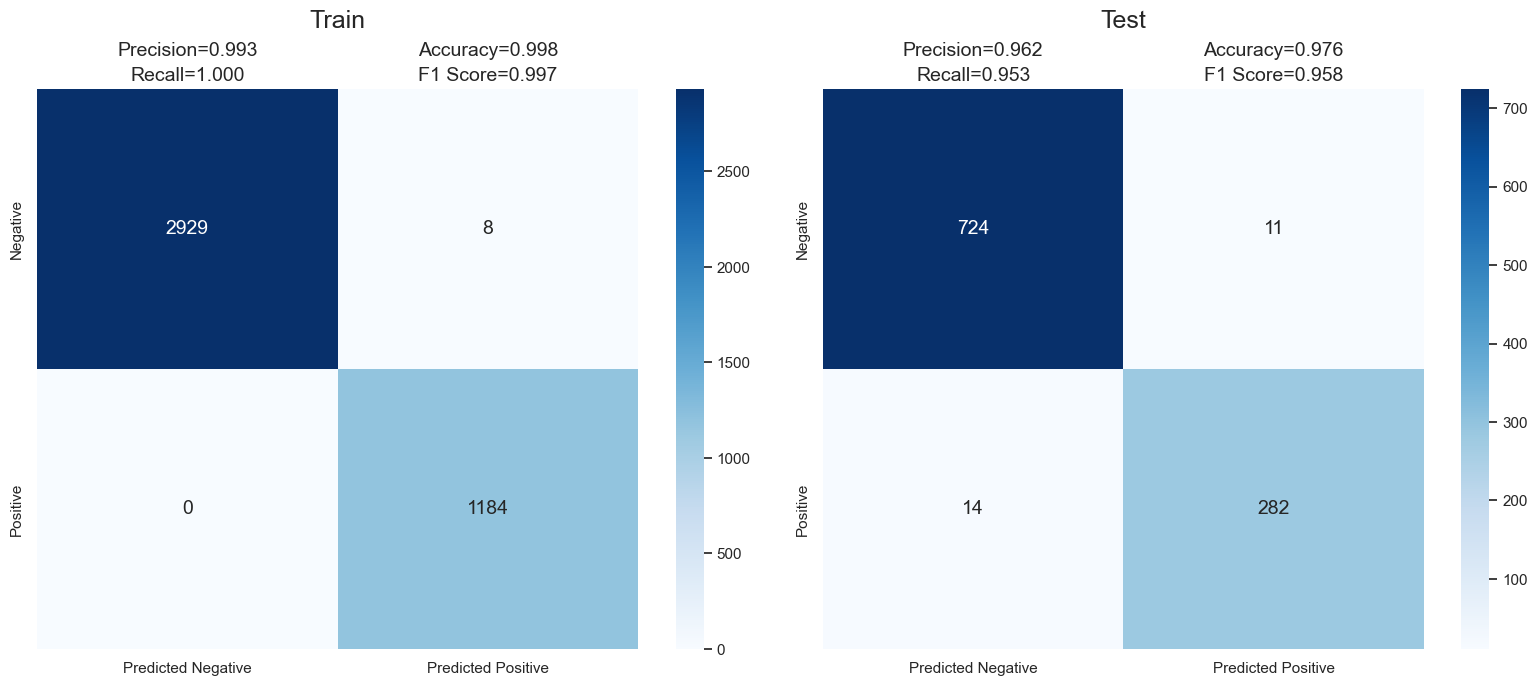

In [19]:
best_parameters = study.best_params
best_pipeline = get_best_pipeline(best_parameters)
best_pipeline.fit(X_train, y_train)
plot_confusion_matrices(best_pipeline, (X_train, X_test, y_train, y_test))

## Topic Modeling of SPAM emails

**Topic Modeling** is a widely used technique in text analysis to identify relevant topics within a corpus of documents. A popular algorithm used for this purpose is **Latent Dirichlet Allocation (LDA)**. 

As explained in [this article](https://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/), cited by Gensim's official documentation, LDA represents documents as mixtures of topics that spit out words with certain probabilities, and seeks to assign probabilities to each term belonging to a specific topic. It assumes that documents are produced in the following fashion: when writing each document, you

* Decide on the number of words $N$ the document will have (say, according to a Poisson distribution).
* Choose a topic mixture for the document (according to a Dirichlet distribution over a fixed set of $K$ topics).
* Generate each word $w_i$ in the document by:
    1. First picking a topic (according to the multinomial distribution that you sampled above).
    2. Using the topic to generate the word itself (according to the topic’s multinomial distribution).

Assuming this generative model for a collection of documents, LDA then tries to backtrack from the documents to find a set of topics that are likely to have generated the collection. 

To apply LDA in practice, we can use the **Gensim** library in Python. Let's consider an example with a small text corpus provided by the library, i.e. `common_texts`. First, we create a dictionary and a corpus using the Gensim library, then train an LDA model setting to 3 the number of requested latent topics to be extracted from the training corpus. Here is how the code might look:

In [20]:
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamulticore import LdaMulticore

common_dictionary = Dictionary(common_texts)
common_corpus = [common_dictionary.doc2bow(text) for text in common_texts]
num_topics = 3

lda = LdaMulticore(corpus = common_corpus, 
                   id2word=common_dictionary, 
                   num_topics=num_topics)

In [21]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [22]:
common_corpus

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(2, 1), (5, 1), (7, 1), (8, 1)],
 [(1, 1), (5, 2), (8, 1)],
 [(3, 1), (6, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(4, 1), (10, 1), (11, 1)]]

As can be seen, each document is converted into a list of `(token_id, token_count)` tuples.

The keywords for each topic and weightage of each keyword can be seen by using `lda.print_topics()`:

In [23]:
topics = lda.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.138*"interface" + 0.126*"graph" + 0.121*"human" + 0.120*"computer" + 0.120*"minors"')
(1, '0.163*"user" + 0.114*"response" + 0.114*"time" + 0.113*"system" + 0.079*"trees"')
(2, '0.205*"system" + 0.180*"trees" + 0.114*"human" + 0.113*"eps" + 0.113*"graph"')


For example, the topic probability distribution for the first document is:

In [24]:
lda[common_corpus[0]]

[(0, 0.82362056), (1, 0.08750659), (2, 0.08887282)]

Now, let's apply the LDA model we just discussed to the spam emails. 

To do this, we filter the dataset to isolate spam emails, and then tokenize the cleaned text, considering only words with a length greater than 1. Subsequently, we employ Gensim's `Phrases` class to detect and link relevant bigrams and trigrams that occur at least 20 times. Notably, the `trigram` object may also generate 4-grams in instances where two bi-grams are conjoined.

These newly identified phrases are incorporated into the tokenized spam emails, forming a list of cleaned tokens with integrated bigrams, trigrams and 4-grams. A Gensim dictionary is then created based on this tokenized data, which is further filtered to remove less informative tokens, using the 2 parameters:
* `no_below`, to only keep tokens which are contained in at least `no_below` documents. In my case, I set it to $5$.
* `no_above`, to only keep tokens which are contained in no more than `no_above` documents (fraction of total corpus size, not an absolute number). In my case, I set it to $0.95$.

Finally, a bag-of-words representation is generated for the cleaned tokens, providing a suitable corpus for input into the LDA model.

In [26]:
from email_analysis_library.lda import (
    lda_preprocessing,
    plot_coherence_values
)

spam_df = df[df["label"]=="spam"]
cleaned_tokens_with_bigrams_trigrams, dictionary, corpus = lda_preprocessing(spam_df['text_cleaned'])

Dictionary size before filtering: 35648
Dictionary size before filtering: 4084


In topic modeling, **topic coherence** measures the quality of the data by comparing the semantic similarity between highly repetitive words in a topic. Coherence score is a scale from 0 to 1 in which a good coherence (high similarity) has a score of 1, and a bad coherence (low similarity) has a score of 0.

According to the paper [Michael Roeder, Andreas Both and Alexander Hinneburg: “Exploring the Space of Topic Coherence Measures”](https://svn.aksw.org/papers/2015/WSDM_Topic_Evaluation/public.pdf), among the existing coherence measures, $C_V$ coherence was found to correlate the highest with human interpretation (by considering six different datasets). Therefore, in the following the latter is used to measure how good a given topic model is and select the optimal number of topics, considering a range $[2,15]$.

Training and evaluating LDA models: 100%|██████████████████████████████████████| 14/14 [06:52<00:00, 29.43s/num_topics]


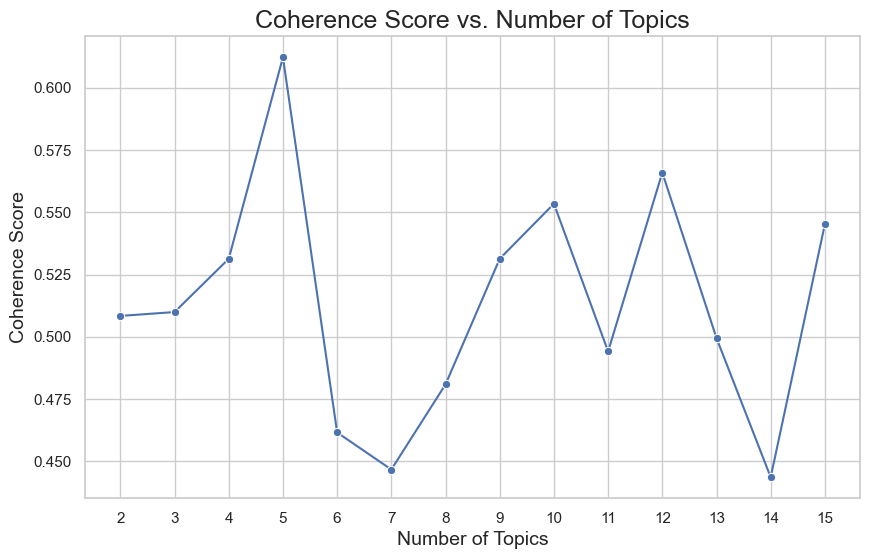

In [27]:
topics = list(range(2,16))

plot_coherence_values(cleaned_tokens_with_bigrams_trigrams, corpus, dictionary, topics)

From the coherence score's results, the number of topics is therefore chosen to be 5. Let's train again this model, so that the topics and their characteristic words can be studied more in detail:

In [34]:
from gensim.models.ldamulticore import LdaMulticore

num_topics = 5

lda = LdaMulticore(corpus=corpus, 
                   id2word=dictionary, 
                   num_topics=num_topics, 
                   passes=10)

As in the example, the keywords for each topic and weightage of each keyword can be seen by using `lda.print_topics()`:

In [35]:
topics = lda.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.009*"font" + 0.009*"price" + 0.008*"info" + 0.007*"align" + 0.007*"software" + 0.007*"href" + 0.006*"size" + 0.006*"new" + 0.006*"ms" + 0.006*"br"')
(1, '0.025*"company" + 0.010*"stock" + 0.006*"inc" + 0.006*"report" + 0.006*"may" + 0.006*"market" + 0.005*"business" + 0.005*"share" + 0.005*"news" + 0.005*"include"')
(2, '0.007*"money" + 0.006*"please" + 0.005*"de" + 0.005*"number" + 0.005*"one" + 0.005*"us" + 0.004*"online" + 0.004*"email" + 0.004*"international" + 0.004*"order"')
(3, '0.007*"good" + 0.006*"new" + 0.006*"want" + 0.006*"time" + 0.005*"take" + 0.005*"free" + 0.005*"email" + 0.005*"click" + 0.005*"go" + 0.005*"offer"')
(4, '0.007*"account" + 0.005*"cd" + 0.004*"use" + 0.004*"please" + 0.004*"system" + 0.004*"price" + 0.004*"pro" + 0.004*"us" + 0.004*"information" + 0.004*"rolex"')


The LDA model can be visualized by means of `pyLDAvis`, using the following code snippet:

In [36]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
lda_display = gensimvis.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

As described [here](https://cran.r-project.org/web/packages/LDAvis/vignettes/details.pdf), each circle on the left-hand side represents a topic. Their areas are set to be proportional to the proportions of the topics across the N total tokens in the corpus. Therefore, the larger the circle, the more prevalent or dominant the topic is. The centers of the topic circles are laid out in two dimensions according to a **multidimensional scaling (MDS)** algorithm that is run on the inter-topic distance matrix. The latter is computed using **Jensen-Shannon divergence**, which is a method of measuring the similarity between two probability distributions.

In addition, on the right-hand side of the visualization, it's also possible to see the top-30 most relevant terms for each topic by moving the cursor over the circles.

## Extracting organizations from the non-SPAM emails

**Named Entity Recognition (NER)** is a task in NLP that involves identifying and classifying entities such as persons, organizations, locations, dates, and more within a given text. This helps us enhance our understanding of the contextual information present in textual data.

The following code snippet demonstrates the utilization of **spaCy**, a popular NLP library, to perform NER on a sample sentence and identify the entity types associated with each token:

In [37]:
import spacy

nlp = spacy.load('en_core_web_trf', disable=['parser'])
sentence = "Amazon is one of the 3 best companies for ecommerce in Europe"
doc = nlp(sentence)

for token in doc:
    print(str(token) + " : " + str(token.ent_type_))

Amazon : ORG
is : 
one : 
of : 
the : 
3 : CARDINAL
best : 
companies : 
for : 
ecommerce : 
in : 
Europe : LOC


This code exemplifies the NER process using spaCy. First, we load the `en_core_web_trf` model, a pre-trained English pipeline trained on written web text, which is provided by `spacy` library and was already used in the preprocessing phase to perform lemmatization. Subsequently, a sample sentence is processed through the model, and each token in the sentence is printed alongside its associated named entity type. The output provides a detailed breakdown of the entity types identified for each token.

Additionally, spaCy's visualization tool, `displacy`, can be used to generate a visual representation of the named entities within the sentence:

In [38]:
import spacy.displacy as displacy
displacy.render(doc, style="ent")

C:\Users\gugli\Desktop\venv\spam_venv\lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


Let's now use the same idea to extract organizations, a specific category within NER, labeled by "ORG", from non-spam (ham) emails. To do this, the `get_organizations()` custom function has been defined:

In [39]:
from email_analysis_library.ner import get_organizations

ham_df = df[df["label"]=="ham"]
organizations_dict = get_organizations(ham_df["text_cleaned"])

Extracting organizations: 100%|██████████████████████████████████████████████| 3672/3672 [09:04<00:00,  6.75document/s]


The result of the function is a dictionary where:
* Each key in the dictionary corresponds to a document from the input corpus.
* The associated value for each key is a list of organizations extracted from the respective document.

As an example, let's show the first 10 emails with the corresponding organizations:

In [40]:
count = 0

for email, orgs in organizations_dict.items():
    num_orgs = len(orgs)
    if num_orgs > 0 and count <= 10:
        print(f"The following email contains {num_orgs} organizations:")
        for i in range(num_orgs):
            print(f"- {orgs[i]}")
        print(f"\n{email}")
        print(f"\n----------------------------------------------------\n")
        count+=1

The following email contains 2 organizations:
- enron
- methanol

enron methanol meter follow note give monday preliminary flow datum provide daren please override pop daily volume presently zero reflect daily activity obtain gas control change need asap economic purpose

----------------------------------------------------

The following email contains 3 organizations:
- heartland
- country
- inn

neon retreat ho ho ho around wonderful time year neon leader retreat time know time year extremely hectic tough think anything past holiday life go past week december january think minute calender hand begin fall semester retreat schedule weekend january youth ministers conference brad dustin connected week go change date follow weekend january come part need think think agree important we together time recharge battery far spring semester lot trouble difficult we away without kid etc brad come potential alternative together weekend let know prefer first option retreat similar do past severa

In [48]:
total_count = sum(1 for value in organizations_dict.values() if value)
print(f"The total number of ham emails containing organizations is {total_count}.")

The total number of ham emails containing organizations is 2306.


This concludes my NLP project on email analysis. I hope it has been informative and enjoyable. Until next time! 😊